<a href="https://colab.research.google.com/github/AlamBinary01/Imtaiz-store-sales-analysis/blob/mian/Imtaiz_store_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load data file
data_frame= pd.read_json("electronics.json")
data_frame.sample(10)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
573,55ac6afb-1ece-4dd8-9664-0cb0da9ceb0a,78,Female,,"5272 Stewart Plain Apt. 491\nLake Jamesberg, W...",575d173d-6ae8-4a06-b6e5-cd67be3a7cd3,2023-07-20,4584661a-4004-441f-b02b-8c647afe4826,Electronics,Brand_C,147,33,9,2,Medium,01,2015,Fall
950,1abad82c-f7ca-4b72-a74e-7f5d20e093ca,22,Other,Medium,"8397 Jones Orchard Suite 167\nJohnsonside, NV ...",30d8d4da-1f7c-401a-9095-b8c5f22b5ecd,2021-06-26,3b1452df-e956-4aaf-be6c-eec873630958,Clothing,Brand_A,479,99,2,1,Medium,02,2005,Summer
680,dfb953c1-eedd-41cb-a140-fc17c61fb56d,76,Female,Medium,"7502 Jeffrey Squares\nSouth Cassandra, WV 33208",c39fa27b-bffb-417d-991d-0ba96f966be8,2022-12-29,8f598b37-33b6-48be-a362-99f5a1c5766e,Books,Brand_B,456,8,6,10,Low,08,2009,Fall
782,5c8cf4d6-71f4-46fe-ae6a-16163b7708ae,68,Other,Low,"465 Marcia Hills Suite 785\nValdezhaven, UT 58502",784159eb-7686-4ba7-a997-76ea87ad4a24,2021-06-16,f07fb954-689a-4cc9-9429-67ccc9cddef1,Electronics,Brand_B,137,12,6,4,High,07,,Winter
767,308f6744-0a72-4896-861d-e4fc8e48f548,74,Other,Low,"00282 Anderson Gateway\nLake Gregory, OK 56520",68b1be7c-8736-4af7-a4e3-5ddd7956679e,2021-07-30,c3244f56-5641-46e7-8ad0-e942dad96108,Electronics,Brand_B,210,24,4,3,Medium,,1994,Spring
559,3c2a4a2f-924f-42b2-ab00-aad7341312f4,18,Other,Medium,USNS Houston\nFPO AP 36478,2be870ca-1aa3-4ff6-aaa2-39e6b41eef36,2020-08-07,,Clothing,Brand_C,297,48,4,6,Low,03,1980,Fall
556,db883018-817d-489f-b3a9-2b4b10bd1ac9,51,Male,Low,"586 Sullivan Lake Apt. 970\nPort Robert, AZ 60427",4d00b651-42df-45d9-86f7-0b2cc73e06d9,2023-01-14,2aa568f7-ea92-442a-b646-1ff632ecf767,Books,Brand_A,138,53,5,3,High,07,2002,Fall
678,4b49ae08-fff0-4a30-8bba-9125b8f76204,66,Other,High,"8517 Connor Forks Apt. 941\nNorth Deborah, TN ...",8752f092-da5f-480c-8a50-4c508af953ef,2023-11-20,1819d4f2-40b5-4068-af09-ef2b539fde74,Electronics,Brand_A,361,22,9,7,Low,10,1993,Winter
584,c29e8ca5-d586-4a45-bbca-73cee072c0bf,76,Male,High,"529 Brown Ramp\nLake Dannymouth, PW 56639",80ce3333-5b82-4adc-8e12-d7503e09a6e4,2023-08-24,d630c0cd-c916-44f9-90f0-b4955ef8f79c,Clothing,Brand_C,31,17,1,2,High,Hidden,1990,Fall
102,c54f02eb-65a5-40c7-b01b-1c82ce0ddb9a,47,Female,Low,"PSC 1442, Box 6970\nAPO AP 57510",c48b0e0c-2e44-43a7-ab68-2a4c1aed88e8,2020-01-08,3526aba0-ac41-4211-abbc-5cc20b82228f,Electronics,Brand_B,221,38,4,4,Medium,05,2003,Spring


In [4]:
# # Data Cleaning:
# 1-Identify and handle missing values using appropriate techniques like mean/median imputation or dropping rows/columns with excessive missingness.
# 2-Analyze outliers and determine whether to retain or remove them based on their impact on the analysis.
# 3-Address inconsistencies in data format and encoding.

#converting strings in to numeric
numeric_dataArray = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year']
for column in numeric_dataArray:
    data_frame[column] = pd.to_numeric(data_frame[column], errors='coerce')


#String Datatypes
string_Datatype=['Customer_ID','Gender','Income_Level','Address','Transaction_ID','Product_ID','Product_Category','Product_Category','Brand','Product_Category_Preferences','Season']
for i in string_Datatype:
  data_frame[i]=data_frame[i].astype('string')

#DataType
data_frame['Purchase_Date'] = pd.to_datetime(data_frame['Purchase_Date'], errors='coerce')
# handlin missing values
data_frame = data_frame.replace('', pd.NA)


data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    968 non-null    string        
 1   Age                            960 non-null    float64       
 2   Gender                         967 non-null    string        
 3   Income_Level                   959 non-null    string        
 4   Address                        968 non-null    string        
 5   Transaction_ID                 961 non-null    string        
 6   Purchase_Date                  952 non-null    datetime64[ns]
 7   Product_ID                     960 non-null    string        
 8   Product_Category               956 non-null    string        
 9   Brand                          954 non-null    string        
 10  Purchase_Amount                951 non-null    float64       
 11  Average_Spending_P

In [5]:
data_frame.replace('Hidden', pd.NA, inplace=True)

In [6]:
data_frame.sort_values(by='Purchase_Date',inplace=True)
data_frame.reset_index(drop=True,inplace= True)

In [7]:
# Handling missing values in numerical columns with mean value
numeric_Data = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year']
for i in numeric_Data:
    data_frame[i] = data_frame[i].fillna(np.mean(data_frame[i]))

# Handling missing values in categorical columns with mode value
categorical_Data = ['Gender', 'Income_Level', 'Product_Category', 'Brand', 'Product_Category_Preferences', 'Season',]
for j in categorical_Data:
    data_frame[j] = data_frame[j].fillna(data_frame[j].mode().iloc[0])

# Handling missing values for the Purchase Date column with mode
missing_dates = data_frame['Purchase_Date'].isna()
date_mode = data_frame['Purchase_Date'].mode().iloc[0]
data_frame.loc[missing_dates, 'Purchase_Date'] = date_mode


In [8]:
print(data_frame.isna().sum())

Customer_ID                      44
Age                               0
Gender                            0
Income_Level                      0
Address                          47
Transaction_ID                   50
Purchase_Date                     0
Product_ID                       49
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Count'>

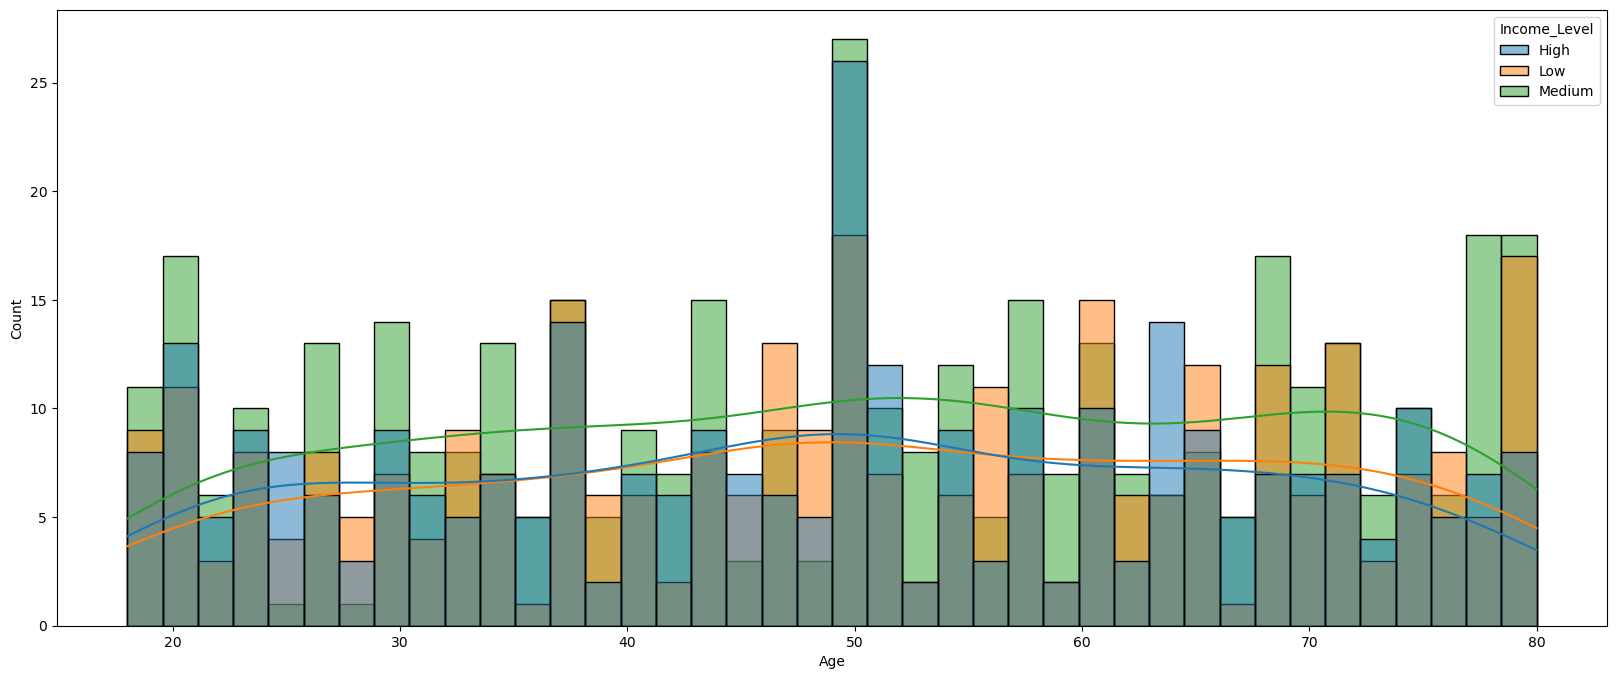

In [9]:
plt.figure(figsize=(20,8))
sns.histplot(data=data_frame, x='Age',hue ='Income_Level', color='purple', kde=True, bins=40, legend=True)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


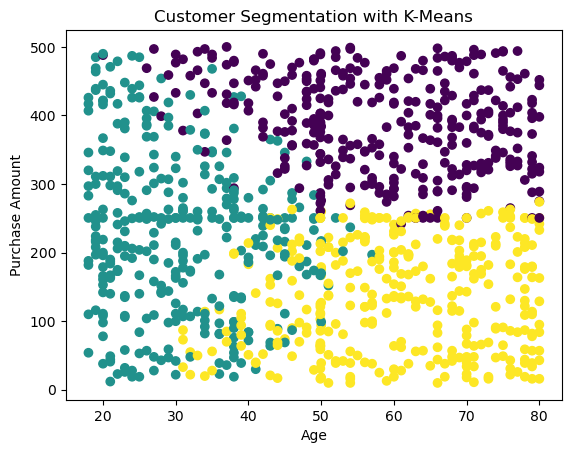

In [34]:
# Assuming you're using Python with pandas and scikit-learn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['Age', 'Purchase_Amount','Average_Spending_Per_Purchase']

# Prepare data
data_for_clustering = data_frame[features].dropna()

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Choose number of clusters (K)
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.scatter(data_for_clustering['Age'], data_for_clustering['Purchase_Amount'], c=data_for_clustering['Cluster'], cmap='viridis')
plt.title('Customer Segmentation with K-Means')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()


# KMEAN

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

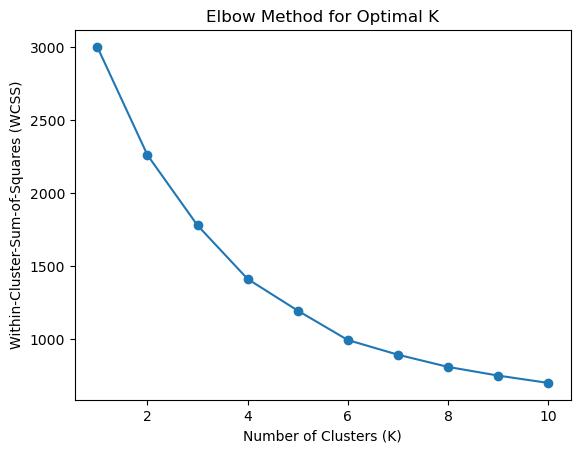

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your data is stored in a DataFrame called 'df'
# Select relevant numerical features for clustering
features = ['Age', 'Purchase_Amount','Average_Spending_Per_Purchase']

# Prepare data
data_for_clustering = data_frame[features].dropna()

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Apply the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares

# Try different values of K (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

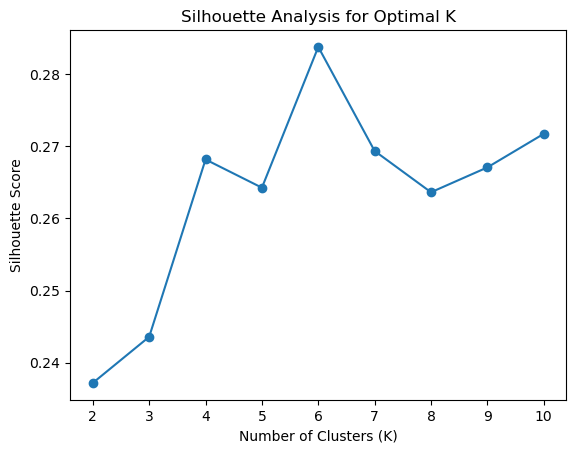

In [12]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette scores for different K values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [13]:
# Assuming you choose the optimal K (let's say K=3)
optimal_k = 6

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_scaled)


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# Analyze key features of each cluster
cluster_analysis = data_for_clustering.groupby('Cluster').mean()

# Display cluster characteristics
print(cluster_analysis)


               Age  Purchase_Amount  Average_Spending_Per_Purchase
Cluster                                                           
0        36.360259       400.880503                      36.992610
1        32.867318       209.552800                      82.406250
2        66.318294       276.693528                      24.668627
3        65.931788       110.384709                      62.880282
4        36.555921       141.122624                      33.830658
5        62.504153       380.930626                      75.765922


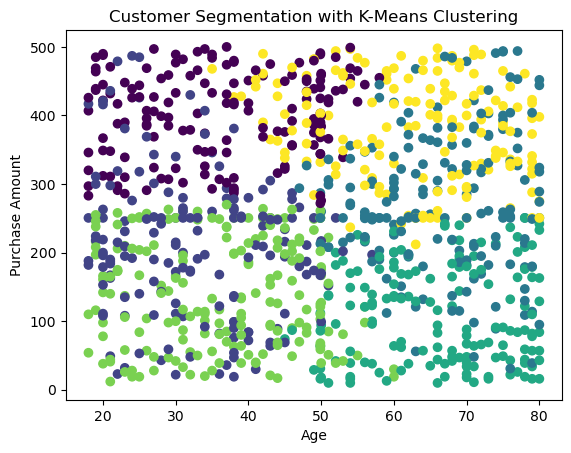

In [15]:
# Visualize clusters in a scatter plot
plt.scatter(data_for_clustering['Age'], data_for_clustering['Purchase_Amount'], c=data_for_clustering['Cluster'], cmap='viridis')
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()


In [16]:
data_frame.nunique()

Customer_ID                      956
Age                               64
Gender                             3
Income_Level                       3
Address                          953
Transaction_ID                   950
Purchase_Date                    698
Product_ID                       951
Product_Category                   3
Brand                              3
Purchase_Amount                  418
Average_Spending_Per_Purchase     97
Purchase_Frequency_Per_Month      11
Brand_Affinity_Score              11
Product_Category_Preferences       3
Month                             13
Year                              54
Season                             4
dtype: int64

In [17]:
# Remove rows with null values in 'Transaction_ID' and 'Customer_ID'
dfc = data_frame.dropna(subset=['Transaction_ID', 'Customer_ID'])

# Verify that null values are removed
dfc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    909 non-null    string        
 1   Age                            909 non-null    float64       
 2   Gender                         909 non-null    string        
 3   Income_Level                   909 non-null    string        
 4   Address                        867 non-null    string        
 5   Transaction_ID                 909 non-null    string        
 6   Purchase_Date                  909 non-null    datetime64[ns]
 7   Product_ID                     866 non-null    string        
 8   Product_Category               909 non-null    string        
 9   Brand                          909 non-null    string        
 10  Purchase_Amount                909 non-null    float64       
 11  Average_Spending_Pe

# KMEAN WITH RFM METRICS

In [35]:
print(rfm_data.isna().sum())

Customer_ID    0
Frequency      0
Monetary       0
Recency        0
RFM_Cluster    0
dtype: int64


In [36]:
# Calculate Recency (R): Days since the last purchase
max_purchase_date = data_frame['Purchase_Date'].max()
data_frame['Recency'] = (max_purchase_date - data_frame['Purchase_Date']).dt.days

# Calculate Frequency (F): Number of transactions per customer
rfm_frequency = data_frame.groupby('Customer_ID')['Transaction_ID'].count().reset_index()
rfm_frequency.columns = ['Customer_ID', 'Frequency']

# Calculate Monetary (M): Total purchase amount per customer
rfm_monetary = data_frame.groupby('Customer_ID')['Purchase_Amount'].sum().reset_index()
rfm_monetary.columns = ['Customer_ID', 'Monetary']

# Merge Recency, Frequency, and Monetary metrics
rfm_data = pd.merge(rfm_frequency, rfm_monetary, on='Customer_ID')
rfm_data = pd.merge(rfm_data, data_frame[['Customer_ID', 'Recency']], on='Customer_ID')


In [1]:
from sklearn.preprocessing import StandardScaler

# Normalize the RFM metrics
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])
rfm_normalized = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'Monetary'])

# Add normalized RFM metrics to the dataframe
rfm_data[['Recency', 'Frequency', 'Monetary']] = rfm_normalized
rfm_data[['Recency', 'Frequency', 'Monetary']]

NameError: name 'rfm_data' is not defined

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

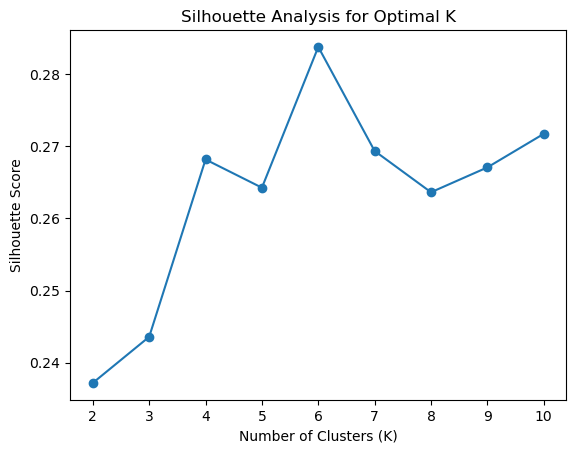

In [38]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette scores for different K values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [39]:
from sklearn.cluster import KMeans

# Assuming you choose the optimal K (let's say K=3)
optimal_k_rfm = 6

# Apply K-Means clustering to RFM data
kmeans_rfm = KMeans(n_clusters=optimal_k_rfm, random_state=42)
rfm_data['RFM_Cluster'] = kmeans_rfm.fit_predict(rfm_normalized)


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
# Analyze key features of RFM clusters
rfm_cluster_analysis = rfm_data.groupby('RFM_Cluster').mean()

# Display RFM cluster characteristics
print(rfm_cluster_analysis)


             Frequency  Monetary   Recency
RFM_Cluster                               
0             0.227388 -0.808735  0.893800
1             0.227388  1.246995 -0.623482
2            -4.397775  0.016532  0.142802
3             0.227388 -1.208542 -0.802154
4             0.227388 -0.032130 -0.866846
5             0.227388  0.868315  1.102069


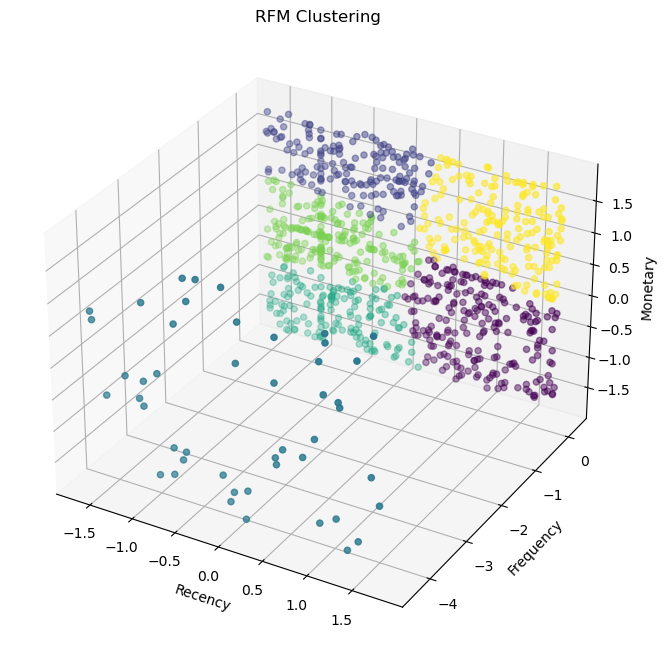

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['Monetary'], c=rfm_data['RFM_Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Clustering')

plt.show()


In [42]:
# Merge RFM clusters with the original data
merged_data = pd.merge(data_frame, rfm_data[['Customer_ID', 'RFM_Cluster']], on='Customer_ID', how='left')


In [43]:
# Analyze key features of each RFM cluster
cluster_analysis = merged_data.groupby('RFM_Cluster').agg({
    'Purchase_Amount': 'mean',
    'Brand_Affinity_Score': 'mean',
    'Product_Category_Preferences': lambda x: x.mode().iloc[0]  # Most frequent product category
}).reset_index()

# Display RFM cluster characteristics
print(cluster_analysis)


   RFM_Cluster  Purchase_Amount  Brand_Affinity_Score  \
0          0.0       139.760940              5.468266   
1          1.0       422.275641              5.699134   
2          2.0       253.175739              5.654023   
3          3.0        84.816327              5.190179   
4          4.0       246.488182              5.107046   
5          5.0       370.234507              5.329039   

  Product_Category_Preferences  
0                          Low  
1                          Low  
2                         High  
3                         High  
4                          Low  
5                          Low  


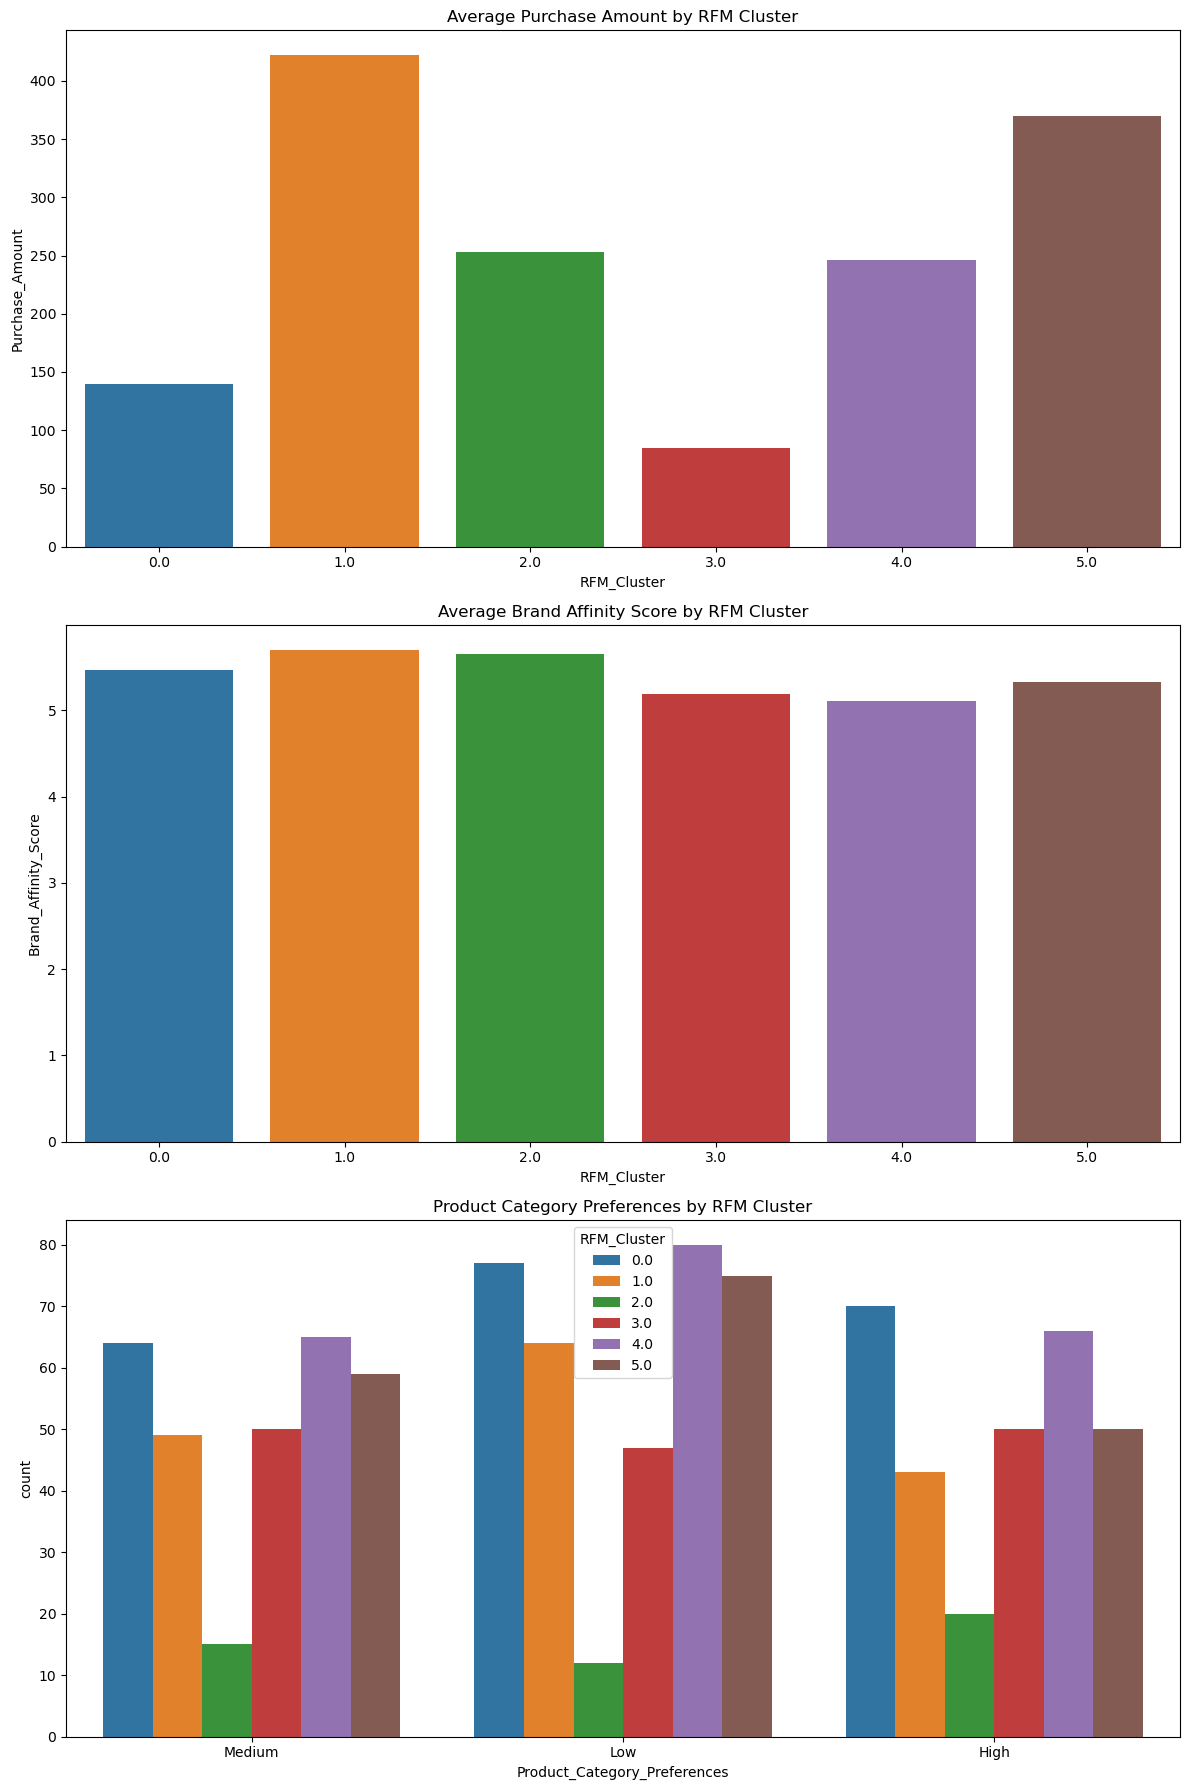

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have three plots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Bar plot for Average Purchase Amount
sns.barplot(x='RFM_Cluster', y='Purchase_Amount', data=cluster_analysis, ax=axes[0])
axes[0].set_title('Average Purchase Amount by RFM Cluster')

# Plot 2: Bar plot for Brand Affinity Score
sns.barplot(x='RFM_Cluster', y='Brand_Affinity_Score', data=cluster_analysis, ax=axes[1])
axes[1].set_title('Average Brand Affinity Score by RFM Cluster')

# Plot 3: Bar plot for Most Frequent Product Category Preference
sns.countplot(x='Product_Category_Preferences', hue='RFM_Cluster', data=merged_data, ax=axes[2])
axes[2].set_title('Product Category Preferences by RFM Cluster')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# DBSCAN

In [49]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your RFM data is in 'rfm_normalized'
# Extract relevant features for DBSCAN
dbscan_data = rfm_normalized[['Recency', 'Frequency', 'Monetary']]

eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]
min_pts_values = [3, 5, 7, 10]

best_eps = None
best_min_pts = None
best_silhouette_score = -1

for eps in eps_values:
    for min_pts in min_pts_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        labels = dbscan.fit_predict(dbscan_data)
        if len(set(labels)) > 1:  # Silhouette score is meaningful for multiple clusters
            silhouette_avg = silhouette_score(dbscan_data, labels)
            print(f"Eps: {eps}, MinPts: {min_pts}, Silhouette Score: {silhouette_avg}")
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_pts = min_pts

print(f"Best Configuration - Eps: {best_eps}, MinPts: {best_min_pts}, Silhouette Score: {best_silhouette_score}")

# 2. Apply DBSCAN Algorithm:
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_pts)
rfm_frequency['DBSCAN_Cluster'] = best_dbscan.fit_predict(dbscan_data)

# 3. Analyze Cluster Characteristics:
dbscan_cluster_analysis = rfm_frequency.groupby('DBSCAN_Cluster').mean()
print(dbscan_cluster_analysis)

# 4. Compare DBSCAN Clusters with K-Means Clusters:
compare_clusters = pd.DataFrame({
    'KMeans_Cluster': rfm_data['RFM_Cluster'],
    'DBSCAN_Cluster': rfm_frequency['DBSCAN_Cluster']
})

cluster_comparison_crosstab = pd.crosstab(compare_clusters['KMeans_Cluster'], compare_clusters['DBSCAN_Cluster'])
print(cluster_comparison_crosstab)


Eps: 0.5, MinPts: 3, Silhouette Score: 0.6056006881762109
Eps: 0.5, MinPts: 5, Silhouette Score: 0.5973131240551176
Eps: 0.5, MinPts: 7, Silhouette Score: 0.6427809739872029
Eps: 0.5, MinPts: 10, Silhouette Score: 0.6427809739872029
Eps: 1.0, MinPts: 3, Silhouette Score: 0.6427809739872029
Eps: 1.0, MinPts: 5, Silhouette Score: 0.6427809739872029
Eps: 1.0, MinPts: 7, Silhouette Score: 0.6427809739872029
Eps: 1.0, MinPts: 10, Silhouette Score: 0.6427809739872029
Eps: 1.5, MinPts: 3, Silhouette Score: 0.6427809739872029
Eps: 1.5, MinPts: 5, Silhouette Score: 0.6427809739872029
Eps: 1.5, MinPts: 7, Silhouette Score: 0.6427809739872029
Eps: 1.5, MinPts: 10, Silhouette Score: 0.6427809739872029
Eps: 2.0, MinPts: 3, Silhouette Score: 0.6427809739872029
Eps: 2.0, MinPts: 5, Silhouette Score: 0.6427809739872029
Eps: 2.0, MinPts: 7, Silhouette Score: 0.6427809739872029
Eps: 2.0, MinPts: 10, Silhouette Score: 0.6427809739872029
Eps: 2.5, MinPts: 3, Silhouette Score: 0.6427809739872029
Eps: 2.5, 

In [50]:
# Compare K-Means and DBSCAN clusters
compare_clusters = pd.DataFrame({
    'KMeans_Cluster': rfm_data['RFM_Cluster'],
    'DBSCAN_Cluster': rfm_frequency['DBSCAN_Cluster']
})

# Crosstab for comparing clusters
cluster_comparison_crosstab = pd.crosstab(compare_clusters['KMeans_Cluster'], compare_clusters['DBSCAN_Cluster'])

# Display cluster comparison
print(cluster_comparison_crosstab)


DBSCAN_Cluster  -1    0
KMeans_Cluster         
0                0  211
1                0  156
2               47    0
3                0  147
4                0  211
5                0  184


# KMEAN ++

In [51]:
from sklearn.cluster import KMeans

# Assuming your RFM data is in 'rfm_normalized' and you want 'k' clusters
k = 5  # Choose the desired number of clusters

# Initialize K-Means++ with the desired number of clusters
kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit the model to the data
rfm_frequency['KMeansPP_Cluster'] = kmeans_pp.fit_predict(rfm_normalized)

# Display cluster characteristics
kmeans_pp_cluster_analysis = rfm_frequency.groupby('KMeansPP_Cluster').mean()
print(kmeans_pp_cluster_analysis)


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                  Frequency  DBSCAN_Cluster
KMeansPP_Cluster                           
0                       1.0             0.0
1                       1.0             0.0
2                       1.0             0.0
3                       0.0            -1.0
4                       1.0             0.0


In [52]:
# Assuming you've already run K-Means and have 'RFM_Cluster' column
# Display cluster characteristics for regular K-Means
kmeans_cluster_analysis = rfm_data.groupby('RFM_Cluster').mean()
print(kmeans_cluster_analysis)

# Compare the clusters formed by K-Means and K-Means++
compare_clusters_kmeans = pd.DataFrame({
    'KMeans_Cluster': rfm_data['RFM_Cluster'],
    'KMeansPP_Cluster': rfm_frequency['KMeansPP_Cluster']
})

# Crosstab for comparing clusters
cluster_comparison_crosstab_kmeans = pd.crosstab(compare_clusters_kmeans['KMeans_Cluster'], compare_clusters_kmeans['KMeansPP_Cluster'])
print(cluster_comparison_crosstab_kmeans)


             Frequency  Monetary   Recency
RFM_Cluster                               
0             0.227388 -0.808735  0.893800
1             0.227388  1.246995 -0.623482
2            -4.397775  0.016532  0.142802
3             0.227388 -1.208542 -0.802154
4             0.227388 -0.032130 -0.866846
5             0.227388  0.868315  1.102069
KMeansPP_Cluster    0    1    2   3    4
KMeans_Cluster                          
0                 189    0   22   0    0
1                   0  154    2   0    0
2                   0    0    0  47    0
3                  11    0    0   0  136
4                   2   51    4   0  154
5                   0    0  184   0    0


# Comparsion And Conclusion

In [53]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# K-Means
kmeans_silhouette = silhouette_score(rfm_normalized, rfm_data['RFM_Cluster'])
kmeans_calinski_harabasz = calinski_harabasz_score(rfm_normalized, rfm_data['RFM_Cluster'])
kmeans_davies_bouldin = davies_bouldin_score(rfm_normalized, rfm_data['RFM_Cluster'])

# K-Means++
kmeans_pp_silhouette = silhouette_score(rfm_normalized, rfm_frequency['KMeansPP_Cluster'])
kmeans_pp_calinski_harabasz = calinski_harabasz_score(rfm_normalized, rfm_frequency['KMeansPP_Cluster'])
kmeans_pp_davies_bouldin = davies_bouldin_score(rfm_normalized, rfm_frequency['KMeansPP_Cluster'])

# DBSCAN
dbscan_silhouette = silhouette_score(rfm_normalized, rfm_frequency['DBSCAN_Cluster'])
dbscan_calinski_harabasz = calinski_harabasz_score(rfm_normalized, rfm_frequency['DBSCAN_Cluster'])
dbscan_davies_bouldin = davies_bouldin_score(rfm_normalized, rfm_frequency['DBSCAN_Cluster'])

# Print the scores
print("K-Means:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Calinski-Harabasz Score: {kmeans_calinski_harabasz}")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin}\n")

print("K-Means++:")
print(f"Silhouette Score: {kmeans_pp_silhouette}")
print(f"Calinski-Harabasz Score: {kmeans_pp_calinski_harabasz}")
print(f"Davies-Bouldin Index: {kmeans_pp_davies_bouldin}\n")

print("DBSCAN:")
print(f"Silhouette Score: {dbscan_silhouette}")
print(f"Calinski-Harabasz Score: {dbscan_calinski_harabasz}")
print(f"Davies-Bouldin Index: {dbscan_davies_bouldin}")


K-Means:
Silhouette Score: 0.40136463938656775
Calinski-Harabasz Score: 967.01438398811
Davies-Bouldin Index: 0.7639918236940982

K-Means++:
Silhouette Score: 0.40866331078686274
Calinski-Harabasz Score: 972.9904573052286
Davies-Bouldin Index: 0.7142525837761191

DBSCAN:
Silhouette Score: 0.6427809739872029
Calinski-Harabasz Score: 477.76493505528055
Davies-Bouldin Index: 0.5867074441516368


In [ ]:
# Analyzing Outliers

for col in numeric_Data:
    Q1 = data_frame[col].quantile(0.25)
    Q3 = data_frame[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_frame[(data_frame[col] < lower_bound) | (data_frame[col] > upper_bound)]
    print(f"Number of outliers for {col} column:", len(outliers))

Number of outliers for Age column: 0
Number of outliers for Purchase_Amount column: 0
Number of outliers for Average_Spending_Per_Purchase column: 0
Number of outliers for Purchase_Frequency_Per_Month column: 0
Number of outliers for Brand_Affinity_Score column: 0
Number of outliers for Month column: 0
Number of outliers for Year column: 0


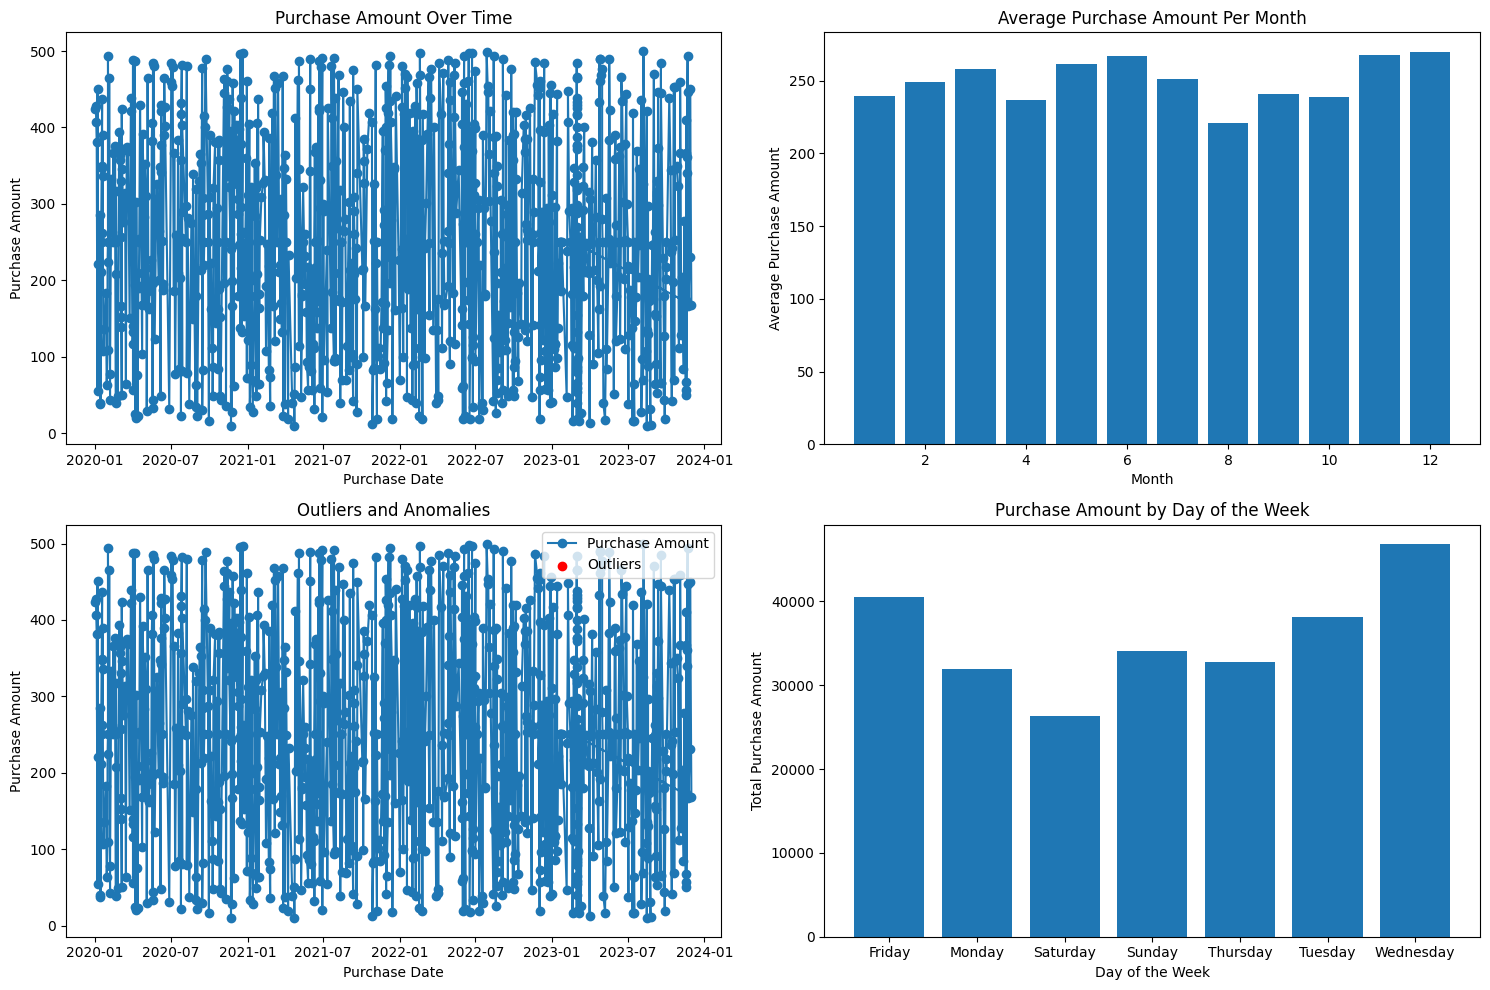

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming data_frame is your DataFrame with 'Purchase_Date' and 'Purchase_Amount' columns
# Make sure 'Purchase_Date' is in datetime format
data_frame['Purchase_Date'] = pd.to_datetime(data_frame['Purchase_Date'])

# Set up subplots
fig = plt.figure(figsize=(15, 10))

# Plotting sales over time
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(data_frame['Purchase_Date'], data_frame['Purchase_Amount'], marker='o', linestyle='-')
ax1.set_title('Purchase Amount Over Time')
ax1.set_xlabel('Purchase Date')
ax1.set_ylabel('Purchase Amount')

# Seasonal Trends
# Example: Extract month and day
data_frame['Month'] = data_frame['Purchase_Date'].dt.month
data_frame['Day'] = data_frame['Purchase_Date'].dt.day

# Group by month and calculate average purchase amount
monthly_purchase = data_frame.groupby('Month')['Purchase_Amount'].mean()

# Plotting average purchase amount per month
ax2 = fig.add_subplot(2, 2, 2)
ax2.bar(monthly_purchase.index, monthly_purchase)
ax2.set_title('Average Purchase Amount Per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Purchase Amount')

# Outliers and Anomalies
z_scores = stats.zscore(data_frame['Purchase_Amount'])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_dates = data_frame.loc[outliers, 'Purchase_Date']

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(data_frame['Purchase_Date'], data_frame['Purchase_Amount'], marker='o', linestyle='-', label='Purchase Amount')
ax3.scatter(outlier_dates, data_frame.loc[outliers, 'Purchase_Amount'], color='red', label='Outliers')
ax3.set_title('Outliers and Anomalies')
ax3.set_xlabel('Purchase Date')
ax3.set_ylabel('Purchase Amount')
ax3.legend()

# Customer Behavior Analysis
data_frame['Day_of_Week'] = data_frame['Purchase_Date'].dt.day_name()
daily_purchase = data_frame.groupby('Day_of_Week')['Purchase_Amount'].sum()

# Plotting purchase amount by day of the week
ax4 = fig.add_subplot(2, 2, 4)
ax4.bar(daily_purchase.index, daily_purchase)
ax4.set_title('Purchase Amount by Day of the Week')
ax4.set_xlabel('Day of the Week')
ax4.set_ylabel('Total Purchase Amount')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Module 2


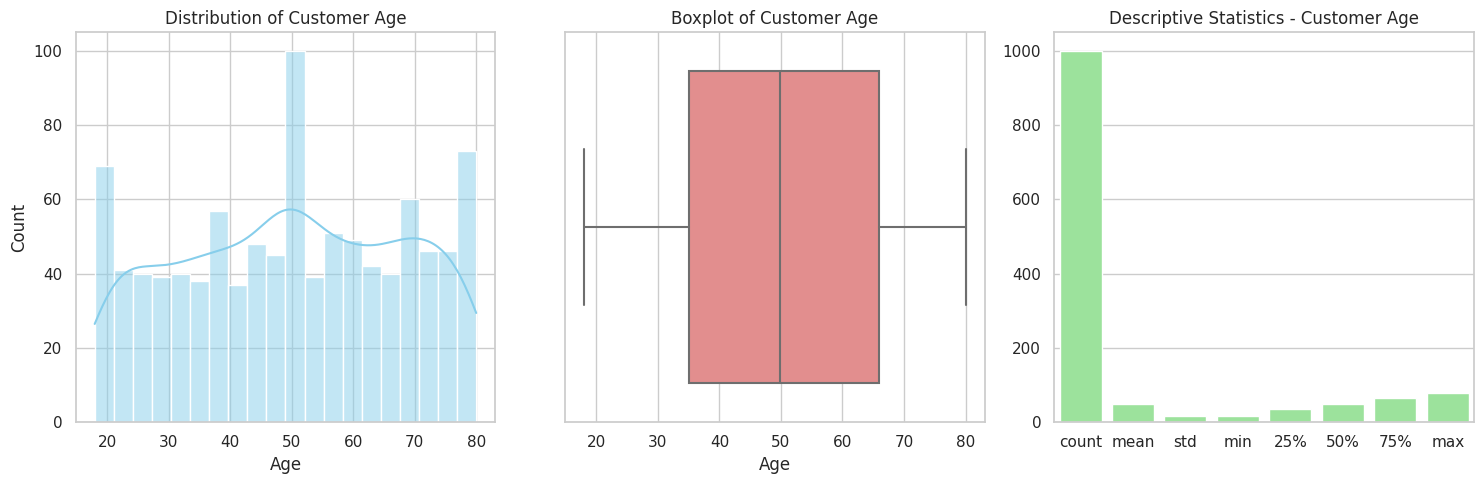

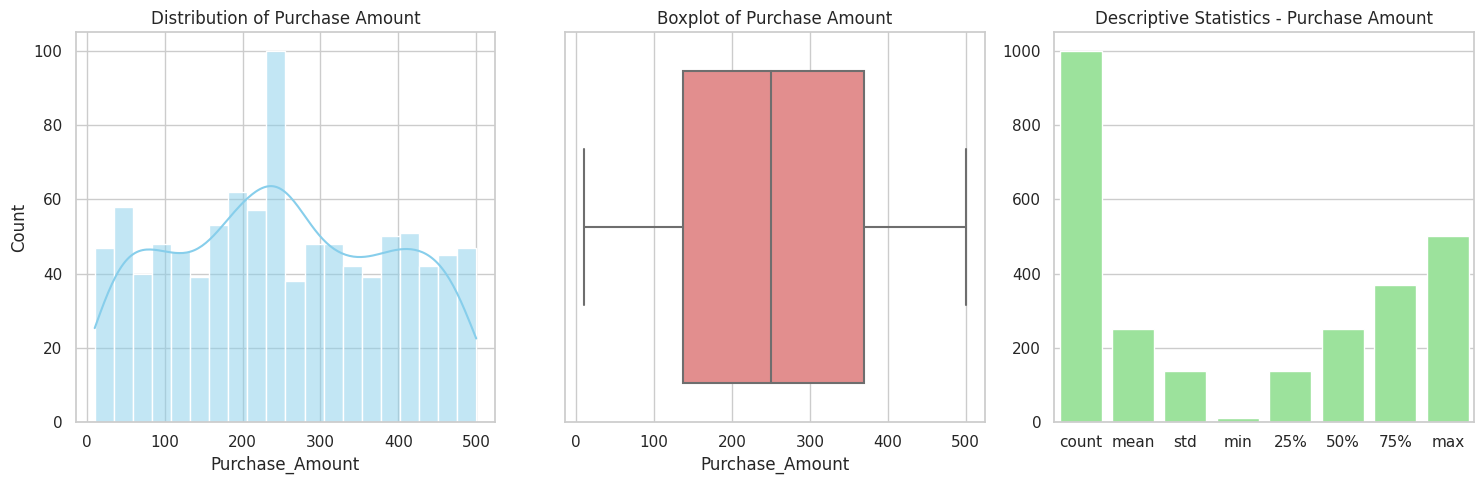

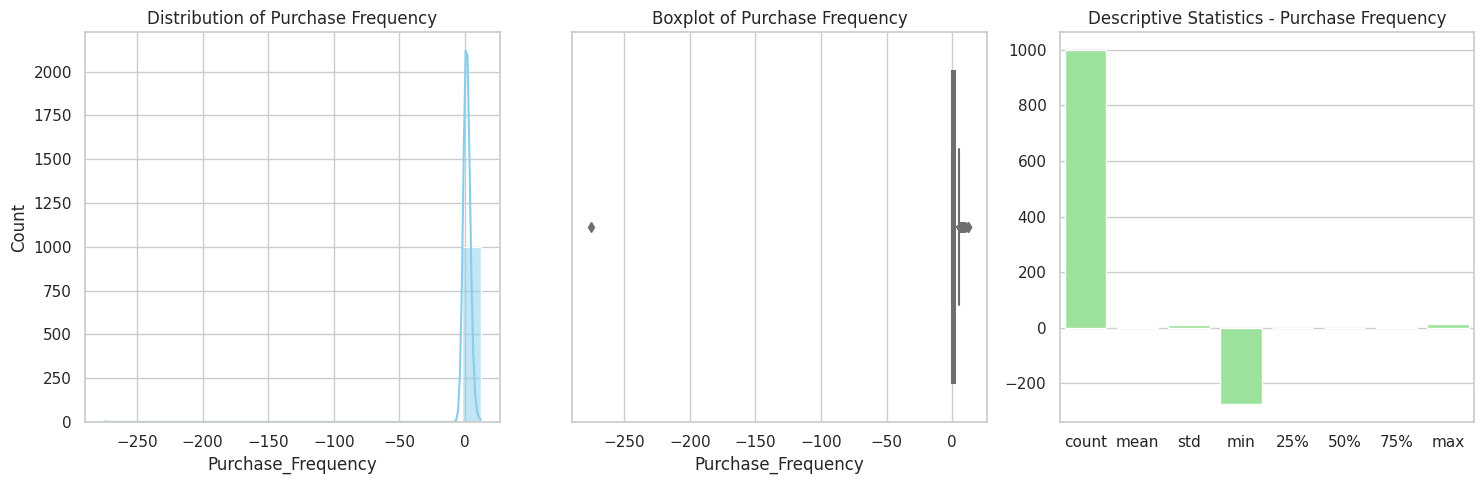

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")
# sns.set(style="ticks", palette="pastel")
plt.figure(figsize=(15, 5))
# Age
plt.subplot(1, 3, 1)
sns.histplot(data_frame['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')

plt.subplot(1, 3, 2)
sns.boxplot(x=data_frame['Age'], color='lightcoral')
plt.title('Boxplot of Customer Age')

plt.subplot(1, 3, 3)
sns.barplot(x=data_frame['Age'].describe().index, y=data_frame['Age'].describe().values, color='lightgreen')
plt.title('Descriptive Statistics - Customer Age')

plt.tight_layout()
plt.show()

#  distribution of purchase amount using a histogram and boxplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data_frame['Purchase_Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amount')

plt.subplot(1, 3, 2)
sns.boxplot(x=data_frame['Purchase_Amount'], color='lightcoral')
plt.title('Boxplot of Purchase Amount')

plt.subplot(1, 3, 3)
sns.barplot(x=data_frame['Purchase_Amount'].describe().index, y=data_frame['Purchase_Amount'].describe().values, color='lightgreen')
plt.title('Descriptive Statistics - Purchase Amount')

plt.tight_layout()
plt.show()

#  distribution of purchase frequency using a histogram and boxplot
data_frame['Purchase_Date'] = pd.to_datetime(data_frame['Purchase_Date'])
data_frame['Purchase_Frequency'] = data_frame['Purchase_Date'].diff().dt.days

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data_frame['Purchase_Frequency'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Purchase Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(x=data_frame['Purchase_Frequency'].dropna(), color='lightcoral')
plt.title('Boxplot of Purchase Frequency')

plt.subplot(1, 3, 3)
sns.barplot(x=data_frame['Purchase_Frequency'].dropna().describe().index, y=data_frame['Purchase_Frequency'].dropna().describe().values, color='lightgreen')
plt.title('Descriptive Statistics - Purchase Frequency')

plt.tight_layout()
plt.show()


In [ ]:
data_frame.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Day,Day_of_Week,Purchase_Frequency
0,a73774fe-d420-46ca-8a43-44eb51438f5e,48.0,Other,High,1412 Blake Parkway Apt. 316 Lake Rodneychester...,c1cba058-2afd-41e4-826c-ea03c51afaad,2020-01-02,1c72a791-7b4d-4f7d-960e-7a611428a870,Books,Brand_C,...,43.0,6.0,5.0,Medium,1,1994.0,Fall,2,Thursday,NaN
1,8f25e25c-75c7-4eb7-b2e2-f708dee8ef13,39.0,Female,Low,414 Lauren Mountain Suite 243 South Jessicaber...,638cded1-9504-4fc9-a1e1-09ee49388c8e,2020-01-03,495c76ec-35f1-4b80-86b5-b91558ffb2a5,Electronics,Brand_C,...,92.0,1.0,7.0,Low,1,2001.0,Winter,3,Friday,1.0
2,228febfa-bfb5-413a-ab8a-1eeb905b36fd,40.0,Female,Low,"50568 Joseph Prairie Port Kimberlyview, ND 33279",96375f25-2e13-4e66-8e76-bbbf06760439,2020-01-04,aab09f53-a4a1-400e-932f-62120350545b,Electronics,Brand_B,...,50.0,9.0,6.0,High,1,1999.0,Fall,4,Saturday,1.0
3,09427631-943f-4427-80e6-79c9da0c2613,71.0,Other,High,"4363 Leslie Hills Lake Mary, FL 20948",be33a103-bf30-4787-ad68-54a3efc8d675,2020-01-05,6cb25dba-2dd1-4724-84d0-322497ead674,Clothing,Brand_C,...,42.0,5.0,8.0,Low,1,1997.0,Spring,5,Sunday,1.0
4,294636f3-e75f-4e3b-a466-48da144e1bb1,32.0,Male,Low,"241 Eaton Streets New John, KS 46332",a06dee84-6d16-46cb-98ae-7a89834129e7,2020-01-07,2c634d1a-8bba-4176-a48b-4d71bcb6084d,Electronics,Brand_B,...,10.0,3.0,7.0,Low,1,1995.0,Summer,7,Tuesday,2.0


In [ ]:
data_frame.to_csv("newData.csv")

#####     If there is a clear pattern or separation between the points for different genders, it suggests that there might be a relationship or correlation between gender and brand affinity. For example, you might observe that one gender group tends to have higher brand affinity scores than the other.

    If the points are scattered randomly without a noticeable pattern, it implies that there may not be a strong correlation between gender and brand affinity.
    

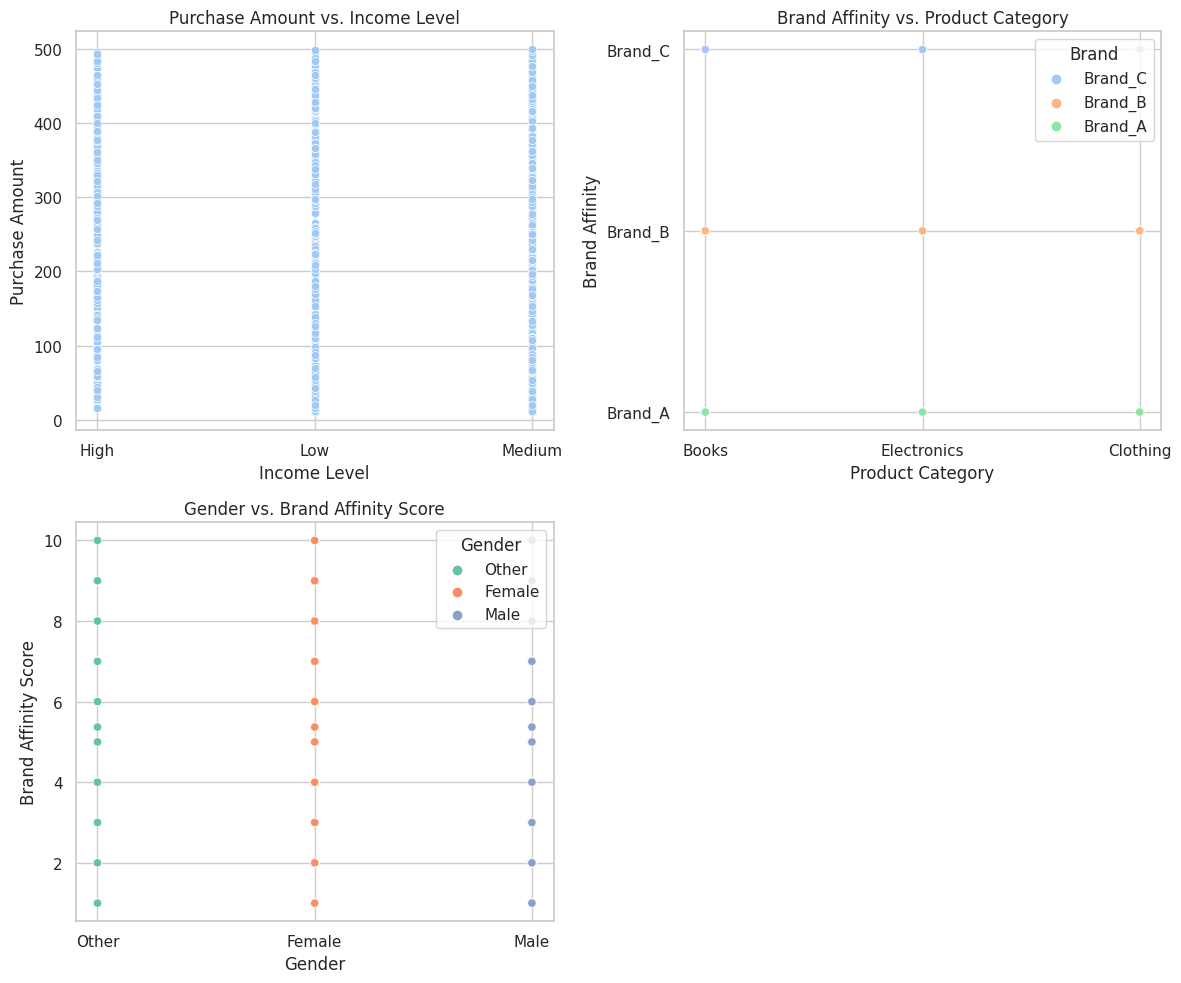

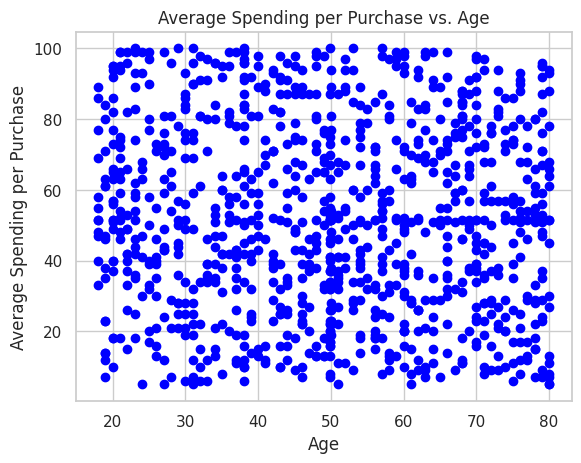

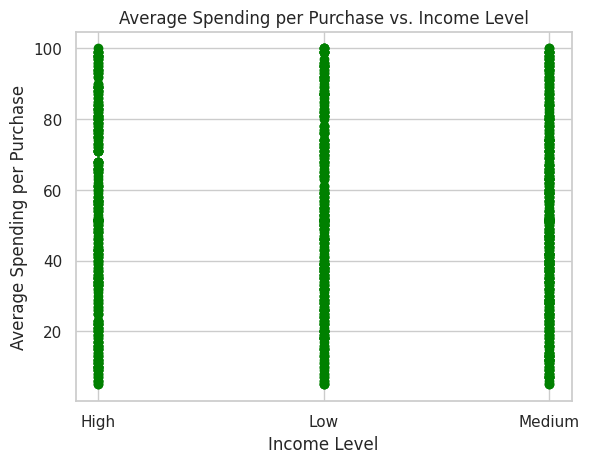

In [ ]:

fig = plt.figure(figsize=(12, 10))

#  Purchase Amount vs. Income Level
ax1 = fig.add_subplot(2, 2, 1)
sns.scatterplot(x='Income_Level', y='Purchase_Amount', data=data_frame, ax=ax1)
ax1.set_title('Purchase Amount vs. Income Level')
ax1.set_xlabel('Income Level')
ax1.set_ylabel('Purchase Amount')

#  Brand Affinity vs. Product Category
ax2 = fig.add_subplot(2, 2, 2)
sns.scatterplot(x='Product_Category', y='Brand', data=data_frame, hue='Brand', ax=ax2)
ax2.set_title('Brand Affinity vs. Product Category')
ax2.set_xlabel('Product Category')
ax2.set_ylabel('Brand Affinity')
ax2.legend(title='Brand',  loc='upper right')

#  Gender vs. Brand Affinity Score
ax3 = fig.add_subplot(2, 2, 3)
sns.scatterplot(x='Gender', y='Brand_Affinity_Score', data=data_frame, hue='Gender', palette='Set2', ax=ax3)
ax3.set_title('Gender vs. Brand Affinity Score')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Brand Affinity Score')
ax3.legend(title='Gender')

plt.tight_layout()
plt.show()


# Average Spending per Purchase vs Age
plt.scatter(data_frame['Age'], data_frame['Average_Spending_Per_Purchase'], color='blue')
plt.title('Average Spending per Purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Average Spending per Purchase')
plt.show()

# Average Spending per Purchase vs Icome Level
plt.scatter(data_frame['Income_Level'], data_frame['Average_Spending_Per_Purchase'], color='green')
plt.title('Average Spending per Purchase vs. Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Spending per Purchase')
plt.show()


<ipython-input-14-373a7a15ce88>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


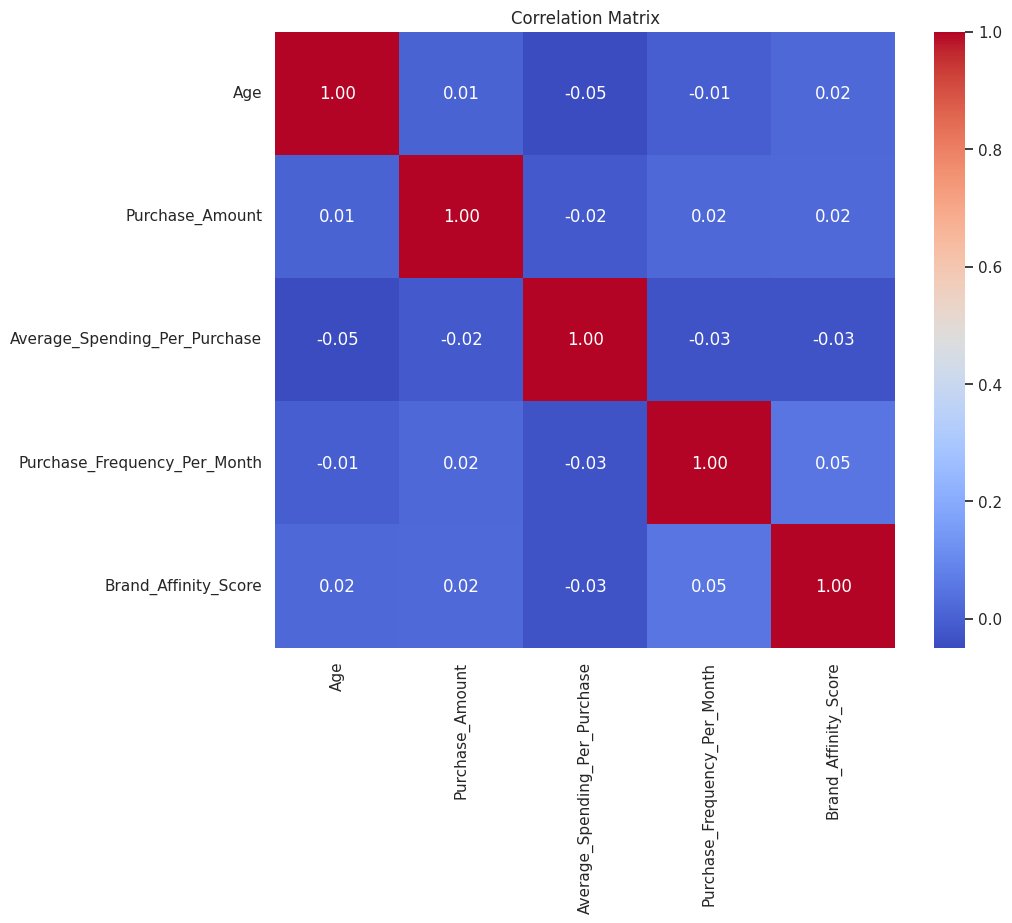

In [ ]:
columns_of_interest = ['Age', 'Income_Level', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
subset_df = data_frame[columns_of_interest]
correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

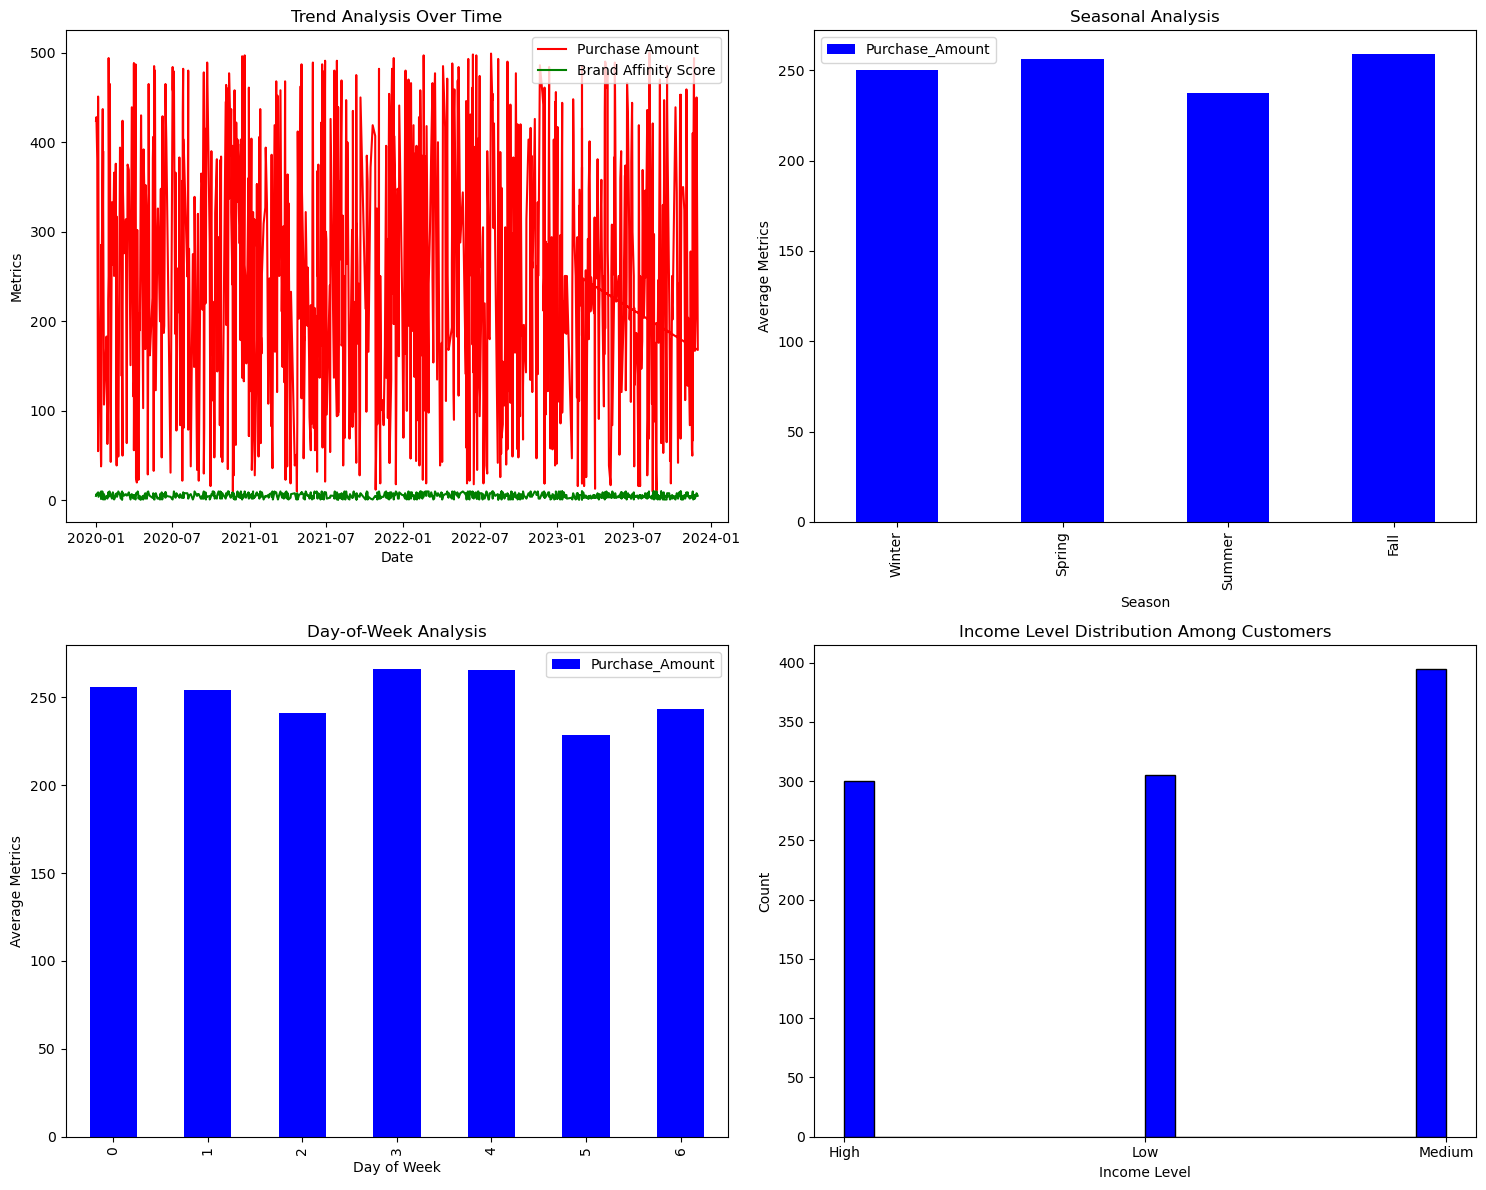

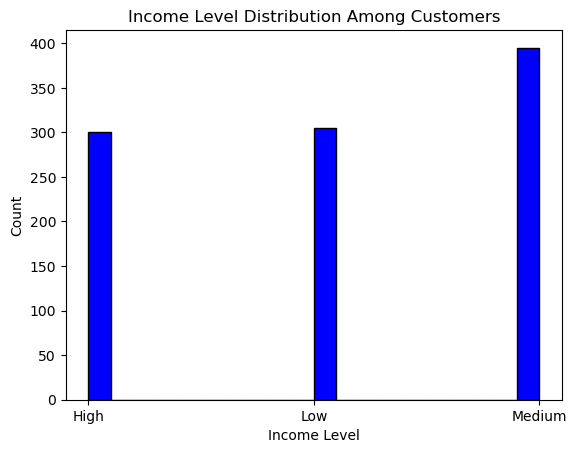

In [54]:
# Convert 'Purchase_Date' to datetime format
data_frame['Purchase_Date'] = pd.to_datetime(data_frame['Purchase_Date'])

# Extract additional date-related features
data_frame['Month'] = data_frame['Purchase_Date'].dt.month
data_frame['Year'] = data_frame['Purchase_Date'].dt.year
data_frame['Season'] = pd.cut(data_frame['Month'], [0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])
data_frame['Day_of_Week'] = data_frame['Purchase_Date'].dt.day_of_week

# Create a figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Trend Analysis

ax1.plot(data_frame['Purchase_Date'], data_frame['Purchase_Amount'], label='Purchase Amount', color='red')
ax1.plot(data_frame['Purchase_Date'], data_frame['Brand_Affinity_Score'], label='Brand Affinity Score', color='green')
ax1.set_title('Trend Analysis Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Metrics')
ax1.legend()

# Seasonal Analysis
seasonal_analysis = data_frame.groupby('Season')[['Purchase_Amount']].mean()
seasonal_analysis.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=ax2)
ax2.set_title('Seasonal Analysis')
ax2.set_xlabel('Season')
ax2.set_ylabel('Average Metrics')

# Day-of-Week Analysis
day_of_week_analysis = data_frame.groupby('Day_of_Week')[['Purchase_Amount']].mean()
day_of_week_analysis.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=ax3)
ax3.set_title('Day-of-Week Analysis')
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Average Metrics')

# Income Level Distribution
ax4.hist(data_frame['Income_Level'], bins=20, color='blue', edgecolor='black')
ax4.set_title('Income Level Distribution Among Customers')
ax4.set_xlabel('Income Level')
ax4.set_ylabel('Count')

# Show all subplots
plt.tight_layout()
plt.show()


#income Level Distribution among customers
plt.hist(data_frame['Income_Level'], bins=20, color='blue', edgecolor='black')
plt.title('Income Level Distribution Among Customers')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()
